# Intelligent Systems - Individual Project Assessment
I aim to split the code into 3 sections:
1. Generating and analysing the datset
2. Developing my classification model
3. Training my model

In [559]:
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import scipy.io as sio
import numpy as np

In [560]:
# set the selected device for the tensors
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
print(torch.cuda.get_device_name(device))

Using device: cuda
NVIDIA GeForce RTX 3050 Laptop GPU


## Dataset

### Data Augmentation
After inspection of the dataset, we have PIL images. Therefore, we will convert these to Tensors.

The values used for the normalisation of data were calculated from the ImageNet training datase

In [561]:
# We perform random transformations to better generalise the training dataset
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(size=(224, 224), antialias=True),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                 std=[0.229, 0.224, 0.225]) 
])
valid_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                 std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                 std=[0.229, 0.224, 0.225])
])

### Downloading and splitting the dataset

In [562]:
# I will download the data from PyTorch's website and use the appropriate data loader
train_dataset = datasets.Flowers102(
    root='flowers102',
    split="train",
    download=True,
    transform=train_transform
)

valid_dataset = datasets.Flowers102(
    root='flowers102',
    split="val",
    download=True,
    transform=valid_transform
)

test_dataset = datasets.Flowers102(
    root='flowers102',
    split="test",
    download=True,
    transform=test_transform
)

# Get the targets and ids
image_labels = sio.loadmat("flowers102/flowers-102/imagelabels")
setids = sio.loadmat("flowers102/flowers-102/setid")

In [563]:
# Look at the data
train_dataset[0]

(tensor([[[ 0.6049,  0.5707,  0.7077,  ..., -1.9124, -1.9124, -1.9124],
          [ 0.6734,  0.6392,  0.7591,  ..., -1.9124, -1.9124, -1.9467],
          [ 0.6906,  0.6392,  0.7933,  ..., -1.8953, -1.9124, -1.9295],
          ...,
          [-1.9638, -1.9124, -1.8782,  ...,  1.0159,  0.9988,  0.9646],
          [-1.9467, -1.8953, -1.8610,  ...,  0.9988,  0.9817,  0.9817],
          [-1.8953, -1.8953, -1.8268,  ...,  1.0502,  1.0331,  1.0331]],
 
         [[ 0.4503,  0.4153,  0.5903,  ..., -1.8606, -1.8431, -1.8431],
          [ 0.4328,  0.3978,  0.5728,  ..., -1.8431, -1.8431, -1.8431],
          [ 0.4503,  0.3978,  0.6078,  ..., -1.8256, -1.8256, -1.8256],
          ...,
          [-1.6681, -1.6331, -1.5980,  ...,  0.6779,  0.6779,  0.6779],
          [-1.6681, -1.6331, -1.6155,  ...,  0.6954,  0.6954,  0.6954],
          [-1.6506, -1.6506, -1.6155,  ...,  0.7829,  0.7829,  0.7829]],
 
         [[ 1.2805,  1.2282,  1.3851,  ..., -1.6999, -1.6999, -1.6999],
          [ 1.2805,  1.2457,

In [564]:
# look at the first training sample
image, label = train_dataset[0]
print(f"Image shape: {image} -> [batch, height, width]")
print(f"Label: {image_labels['labels'][label]}")

Image shape: tensor([[[0.8961, 0.9132, 0.7248,  ..., 1.1872, 1.1700, 1.1015],
         [0.8961, 0.9303, 0.8447,  ..., 1.0844, 0.9817, 0.9646],
         [0.9303, 0.9303, 0.8618,  ..., 1.0673, 1.0159, 1.0331],
         ...,
         [0.9988, 0.9474, 0.8276,  ..., 0.5536, 0.5364, 0.5536],
         [1.0159, 1.0331, 0.8961,  ..., 0.3994, 0.3823, 0.3652],
         [0.9474, 0.9474, 0.8618,  ..., 0.4851, 0.4851, 0.4679]],

        [[0.5203, 0.5378, 0.4328,  ..., 1.2031, 1.1506, 1.0805],
         [0.6254, 0.6604, 0.6078,  ..., 1.0630, 0.9230, 0.8880],
         [0.6604, 0.6604, 0.6254,  ..., 1.0805, 0.9755, 0.9580],
         ...,
         [0.3452, 0.2752, 0.2577,  ..., 0.6604, 0.6429, 0.6254],
         [0.3627, 0.3627, 0.3627,  ..., 0.5553, 0.5378, 0.5203],
         [0.2927, 0.2927, 0.3277,  ..., 0.6429, 0.6078, 0.5903]],

        [[1.4025, 1.4200, 1.2980,  ..., 1.8557, 1.8383, 1.7685],
         [1.4722, 1.5071, 1.3851,  ..., 1.7860, 1.6640, 1.5942],
         [1.5071, 1.5071, 1.4025,  ..., 1.716

In [565]:
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

### Visualise

TypeError: Invalid shape (3, 224, 224) for image data

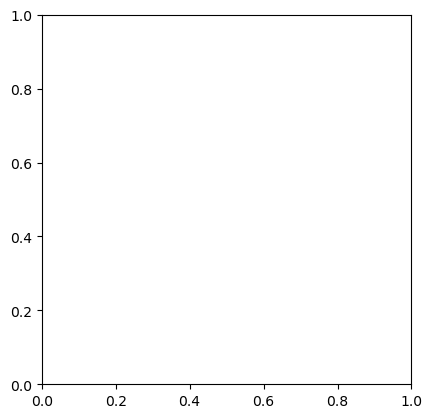

In [567]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
for i in range(9):
    plt.imshow(images[i].numpy())
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')
plt.show()